## Module 3 - Introduction to Neural Network Framework - Assignment
#### by Gaurav Singh (grv08singh@gmail.com)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder as OHE
import tensorflow.keras as tfk
from tensorflow.keras.utils import to_categorical
import warnings as wr
wr.filterwarnings('ignore')

### Objectives:

* Data Preprocessing: __Prepare__ the MNIST dataset for training and testing the neural network model. This includes __normalization__ of image pixel values and __converting__ the output labels to a one-hot encoded format.

In [3]:
(X_train,y_train),(X_test,y_test) = tfk.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

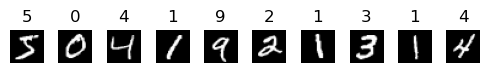

In [12]:
n = 10
fig,ax=plt.subplots(1,n,figsize=(5,2))
for i in range(n):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_title(y_train[i])
    ax[i].axis('off')
fig.tight_layout()
fig.show()

In [13]:
mx = []
mn = []
for i in range(X_train.shape[0]):
    mx.append(X_train[i].max())
    mn.append(X_train[i].min())
print(f"max = {max(mx)}")
print(f"min = {min(mn)}")

max = 255
min = 0


##### Scaling data - minimum=0, maximum=255

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

##### checking class imbalance

In [15]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

##### data is fairly balanced

##### applying __one hot encoding__ on y_train and y_test

In [68]:
num_classes = 10
y_train_ohe = to_categorical(y_train, num_classes)
y_test_ohe = to_categorical(y_test, num_classes)

In [69]:
y_train_ohe.shape

(60000, 10)

In [70]:
y_test_ohe.shape

(10000, 10)

* Model Development: __Create__ a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits. The model should have an __input layer__, one or more __hidden layers__, and an __output layer__.

* Training: __Train__ the neural network model using the preprocessed training data. Utilize __categorical cross-entropy__ as the loss function, __stochastic gradient descent__ as the __optimizer__, and __track accuracy__ as a performance metric.

* Evaluation: __Evaluate__ the performance of the trained model using the testing dataset, __ensuring__ that the model generalizes well to unseen data.

* Prediction: __Implement functionality__ to make predictions on single images or batches of images, returning the digit class with the highest probability

* Analysis: __Analyze__ the results, __understand__ the model's performance, and __explore__ ways to improve it if necessary